In [ ]:
# Why CNN and not ANN
# to overcome the complex mathematical operations, and reduce the number of dimentions
# ANN was more time consuming thats why CNN


In [ ]:
# step-1
# convolutional steps (filtering)


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten  # Importing CNN Module
from tensorflow.keras.utils import to_categorical

In [2]:
with np.load("mnist.npz") as data:
    x_train = data['x_train']    # contain the images (handwritten digits) for training
    y_train = data['y_train']    # contain the images (handwritten digits) for testing
    x_test = data['x_test']      # are the labels corresponding to the images (0-9 digits).
    y_test = data['y_test']      # are the labels corresponding to the images (0-9 digits).

In [3]:
type(x_train)

numpy.ndarray

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
img_1 = x_train[0]
x_train[50].shape

(28, 28)

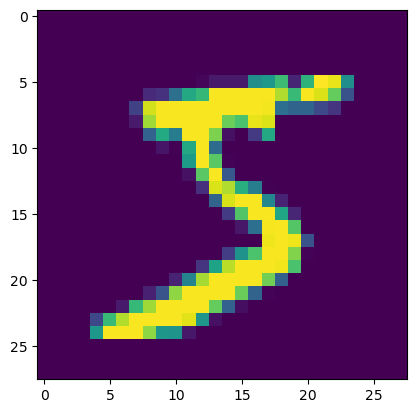

In [6]:
import matplotlib.pyplot as plt
plt.imshow(img_1)

In [7]:
# Normalize the images to a pixel value range of 0 to 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="relu", input_shape=(28, 28)),
    tf.keras.layers.Conv1D(10, 3, activation="relu"),
    tf.keras.layers.Conv1D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 26, 10)         │           850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 24, 10)         │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 22, 10)         │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 220)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         2,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,680 (14.38 KB)

 Trainable params: 3,680 (14.38 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#COMPILING THE MODEL
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [14]:
history_1 = model.fit(x_train, y_train, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7779 - loss: 0.7042 - val_accuracy: 0.9400 - val_loss: 0.2044
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9444 - loss: 0.1958 - val_accuracy: 0.9544 - val_loss: 0.1561
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9581 - loss: 0.1439 - val_accuracy: 0.9668 - val_loss: 0.1106
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9645 - loss: 0.1206 - val_accuracy: 0.9674 - val_loss: 0.1086
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9684 - loss: 0.1044 - val_accuracy: 0.9695 - val_loss: 0.0929


In [15]:
# PLot the validation and training curvees seperately
def plot_loss_curves(history):
  """
  Returns seperate Loss curves for training and validation metrics
  """
  loss= history.history["loss"]
  val_loss= history.history["val_loss"]

  accuracy= history.history["accuracy"]
  val_accuracy= history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # PLot Loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # PLot accuracy
  plt.figure() # Create a new figure
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

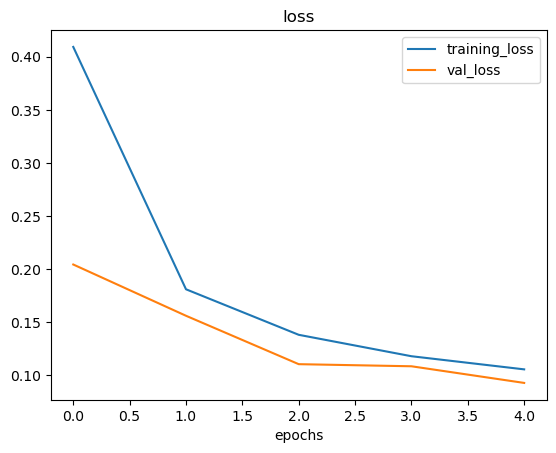

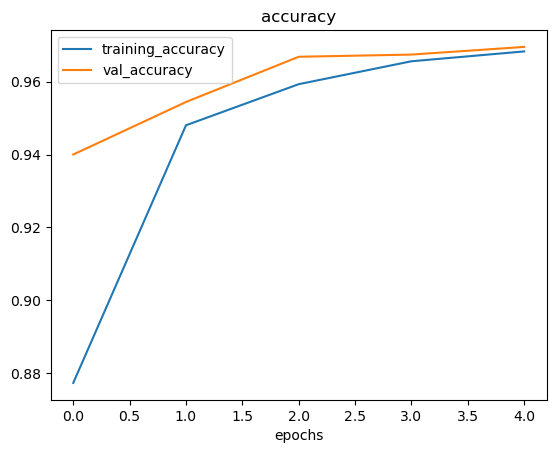

In [16]:
plot_loss_curves(history_1)

In [17]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step


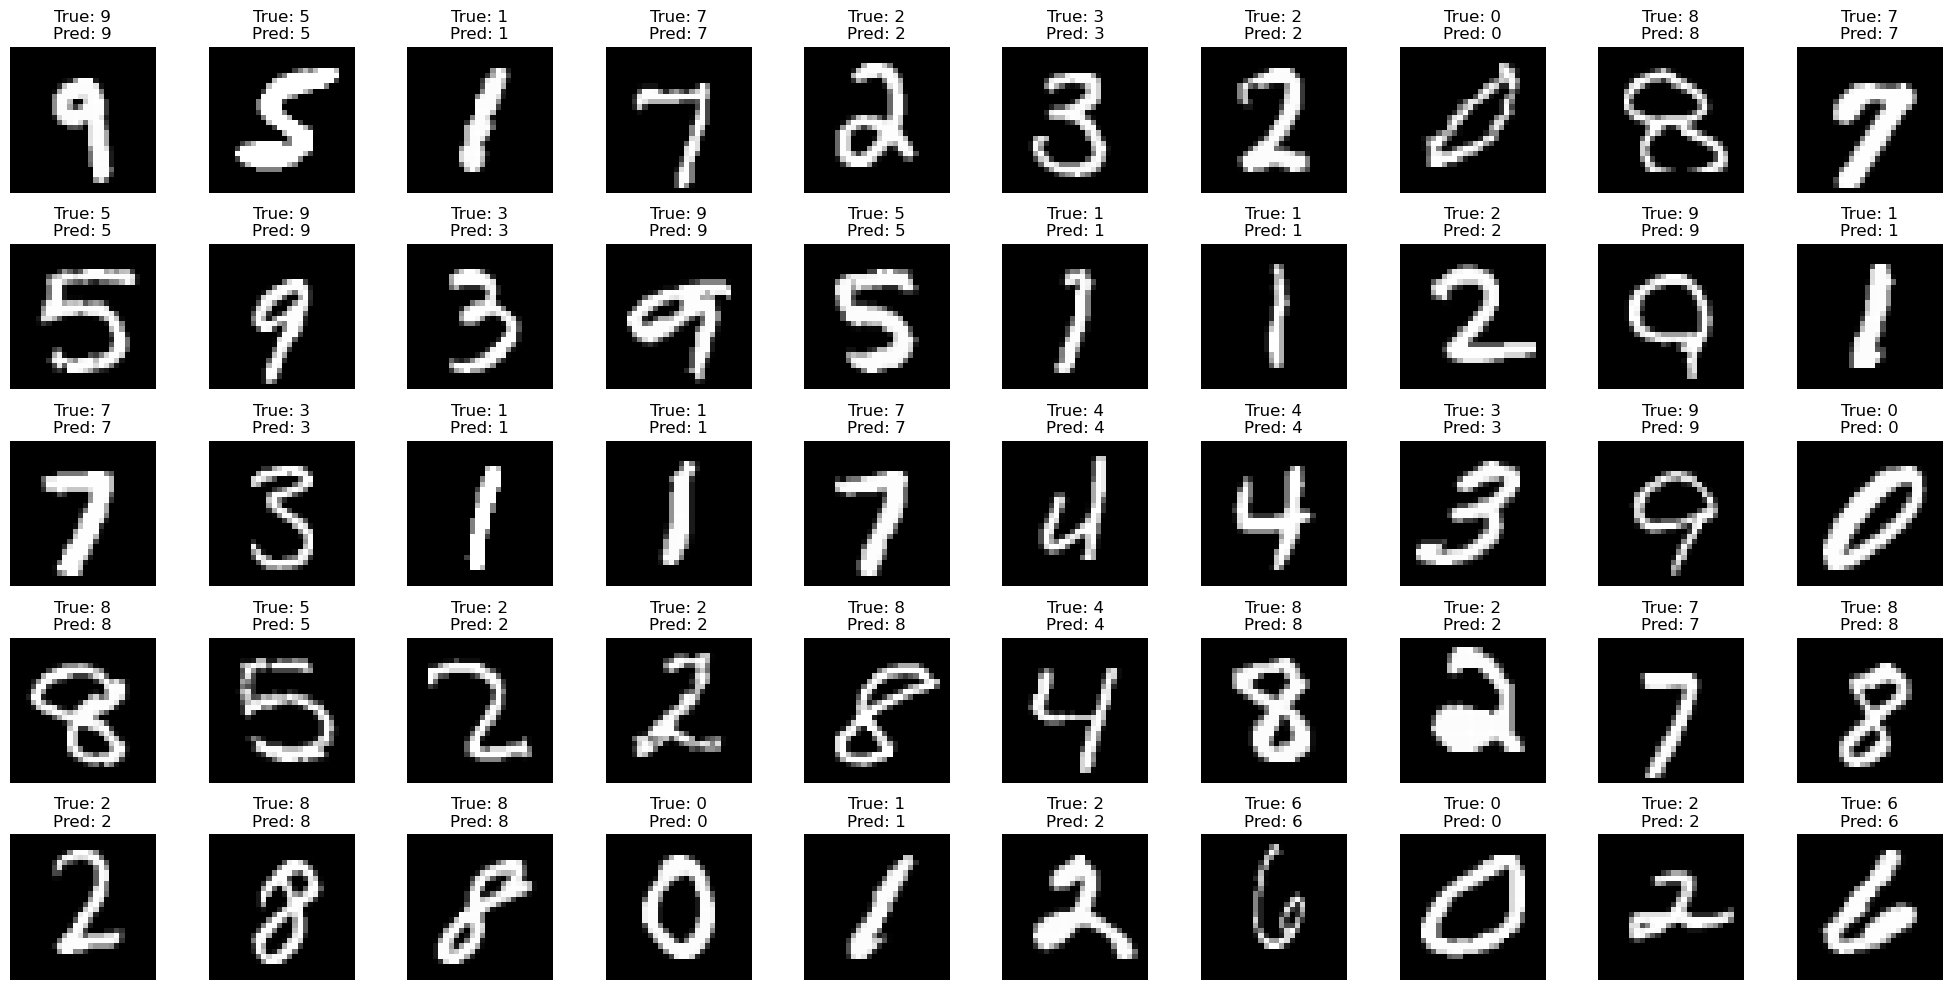

In [18]:
import matplotlib.pyplot as plt

# 1. Select 50 random images from the test set
num_images = 50
random_indices = np.random.choice(x_test.shape[0], num_images, replace=False)
test_images = x_test[random_indices]
true_labels = np.argmax(y_test[random_indices], axis=1)

# 2. Predict the labels for these images
predicted_labels = np.argmax(model.predict(test_images), axis=1)

# 3. Plot the images with their predicted and true labels
plt.figure(figsize=(20, 10))
rows = num_images // 10
for i in range(num_images):
    plt.subplot(rows, 10, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()